In [2]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
data = XSteam(XSteam.UNIT_SYSTEM_BARE)

In [56]:
T,P = 80,0.101325
K = T+273.15
D = 6e-2
qpp = 2000
A = np.pi/4 * D**2
xi = np.pi*D
G = 1e-2 / A
mu = data.my_pt(P,K)
Re = G*D / mu
h = 4.36*data.tc_pt(P,K) / D
T_s = qpp/h + 80
l = 60*data.Cp_pt(P,K-30)*1000*G*A/qpp/xi

48.46788458445055

In [60]:
T = 40+273.15
ri,ro = 10e-3,20e-3
G = .1 / np.pi / (ri**2)
cp = data.Cp_pt(P,T)*1000
qpp = 1e6 * (ro**2-ri**2) / (2*ri)
l = 40*G*cp *(ri**2) / (ro**2 - ri **2) / 1e6
Re = G*2*ri / data.my_pt(P,T+20)
Pr = cp*data.my_pt(P,T+20)/data.tc_pt(P,T+20)
Nu = 0.023*Re**.8*Pr**.3
hreal = Nu*data.tc_pt(P,T+20) / 2/ri
heasy = qpp/(70-60)
hreal,heasy

(2114.196939255096, 1500.0)

In [47]:
40/(qpp*(2*np.pi*ri) / (np.pi*ri**2 * G* cp))

17.734328003783578

In [92]:
L, D = 5,.15
A = L*np.pi*D
md = .05
cp = 1000.5
dt = 103-77
Eloss = md*cp*dt
qpp = Eloss/A
Ts = qpp / 6
Eloss,qpp,Ts

(1300.65, 552.0130046199298, 92.00216743665497)

In [14]:
rho = 852
kf=0.138
mu=0.032
cp=2131
mdot = .5
D,L = 50e-3,25
G = mdot / (np.pi /4 * D**2)
Re = G *D / mu
Pr = mu*cp/ kf
h = 3.66 * kf / D
Ts = 150
Tin = 20
xih = np.pi *D
Tf = lambda z : Ts - (Ts - Tin)*np.exp(- h *xih / (cp * mdot) * z  )
const = - h *xih / (cp * mdot)
130*np.pi*D / const *(np.exp(const * 25) - 1)

np.float64(501.122452917872)

Pressure Drop = 5899.008465376627
Pipe Length = 10.563420928254995


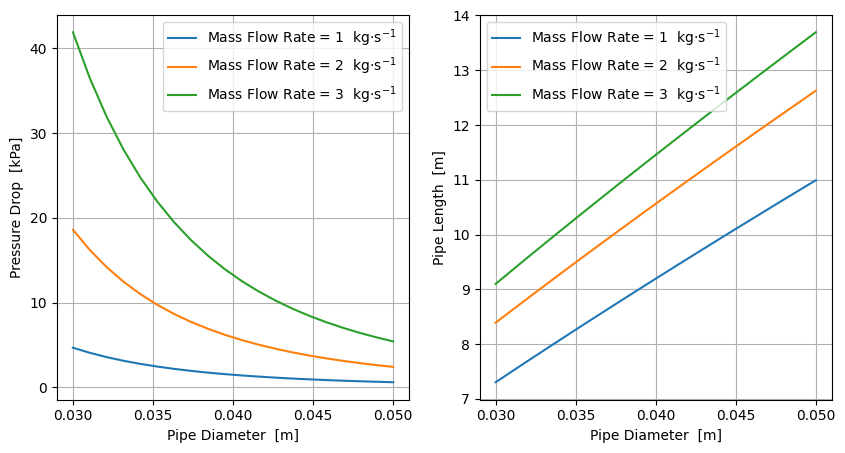

In [52]:
T,P = 50 + 273.15,0.101325
mdot = 2
D = 40e-3
cp = data.Cp_pt(P,T)*1000
mu = data.my_pt(P,T)
kf = data.tc_pt(P,T)
G = lambda D, mdot: mdot / (np.pi /4 * D **2)
Re = lambda D,mdot: D * G(D,mdot) / mu
Pr = cp * mu / kf
h = lambda D, mdot: (0.023 * Re(D, mdot)**0.8 * Pr**0.4) * kf / D
L = lambda D, mdot: np.log(3) * (cp * mdot) / (h(D, mdot) * (np.pi * D))
f = lambda D, mdot: (.79*np.log(Re(D,mdot))-1.64)**(-2)
#Pd = lambda D, mdot: f(D,mdot) * G(D,mdot)**2 * L(D,mdot) / (2* data.rho_pt(P,T)* (1 /4 * D))
Pd = lambda D, mdot: 1/2 * G(D,mdot)**2 / data.rho_pt(P,T) * f(D,mdot) /D * L(D,mdot)
print(f'Pressure Drop = {Pd(D,mdot)}\nPipe Length = {L(D,mdot)}')

ds,mdots = np.linspace(30e-3,50e-3,20), [1,2,3]
fig,ax = plt.subplot_mosaic([['dp','l']],figsize = (10,5))
for m in mdots:
    ax['dp'].plot(ds,Pd(ds,m)*1e-3,label = f'Mass Flow Rate = {m}  kg$\cdot$s$^{{-1}}$')
    ax['l'].plot(ds,L(ds,m),label = f'Mass Flow Rate = {m}  kg$\cdot$s$^{{-1}}$')
ax['dp'].set_ylabel('Pressure Drop  [kPa]')
ax['l'].set_ylabel('Pipe Length  [m]')
for k in ax.keys():
    ax[k].set_xlabel('Pipe Diameter  [m]')
    ax[k].legend()
    ax[k].grid()
fig.savefig('simple.png',dpi=600)

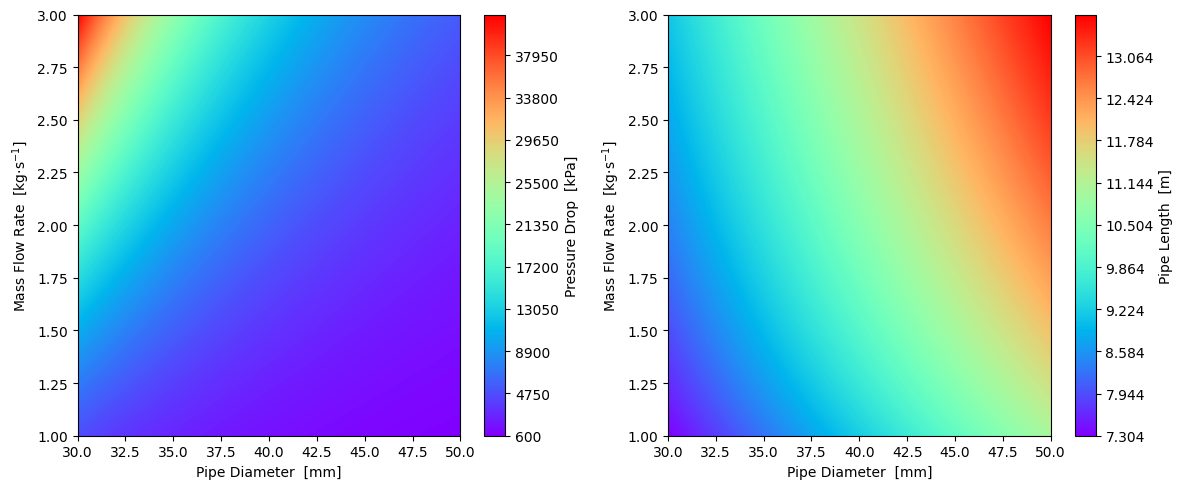

In [51]:
D = np.linspace(30,50,1000)
mdot = np.linspace(1,3,1000)
d,md = np.meshgrid(D,mdot)
fig, ax = plt.subplot_mosaic([['dp','l']],figsize = (12,5))

plotl = ax['l'].contourf(d,md,L(d/1e3,md),1000,cmap='rainbow')
plotp = ax['dp'].contourf(d,md,Pd(d/1e3,md),1000,cmap ='rainbow')
fig.colorbar(plotl, label = 'Pipe Length  [m]')
fig.colorbar(plotp,label = 'Pressure Drop  [kPa]')
for k in ax.keys():
    ax[k].set_xlabel('Pipe Diameter  [mm]')
    ax[k].set_ylabel('Mass Flow Rate  [kg$\cdot$s$^{{-1}}$]')
fig.tight_layout()
fig.savefig('contour.png',dpi=600)

In [28]:
data.rho_pt(P,T)

988.0474768652685